In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_tools import convert_df

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['legend.loc'] = "best"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare data

In [2]:
data_ele = {"ele_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v6/training/calo_matched/*.proto"}
data_gamma = {"gamma_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v6/training/calo_matched/*.proto"}
data_nomatch = {"ele_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v6/training/no_calo_matched/*.proto",
                "gamma_nomatch": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v6/training/no_calo_matched/*.proto"}

features = [ "en_cluster", "et_cluster", "cluster_ieta", "cluster_iphi", "cluster_iz"]
metadata = ["sim_true_eta", "truePU"]

In [3]:
n = 100000
df_ele = convert_df(data_ele, features, metadata, n)
print(df_ele.head(3))
df_gamma = convert_df(data_gamma, features, metadata, n)
print(df_gamma.head(3))
df_nomatch = convert_df(data_nomatch, features, metadata, n)

     en_cluster  et_cluster  cluster_ieta  cluster_iphi  cluster_iz  is_seed  \
0 0   42.140091   32.503555          44.0         241.0         0.0        1   
  1    1.171467    0.841623          49.0         245.0         0.0        0   
  2    0.322796    0.252861          42.0         213.0         0.0        0   

     n_cl  in_sc  sim_true_eta    truePU  
0 0     4      1      0.752142  66.22084  
  1     4      0      0.752142  66.22084  
  2     4      0      0.752142  66.22084  
     en_cluster  et_cluster  cluster_ieta  cluster_iphi  cluster_iz  is_seed  \
0 0  509.880035   82.470795          52.0          68.0         1.0        1   
  1    3.794454    0.571335          56.0          66.0         1.0        0   
  2    2.225798    0.397611          44.0          69.0         1.0        0   

     n_cl  in_sc  sim_true_eta     truePU  
0 0     4      1      2.508502  72.077568  
  1     4      0      2.508502  72.077568  
  2     4      0      2.508502  72.077568  


In [4]:
df = [df_ele, df_gamma, df_nomatch]
df_title = ['electron matched', 'gamma matched', 'no-matched']

# Distributions

In [35]:
energy_range = [[0,30], [30,60], [60,100]]
energy_title = ['0 - 30', '30 - 60', '60 - 100']

In [36]:
df_ele = df_ele[df_ele['is_seed']==1]
df_gamma = df_gamma[df_gamma['is_seed']==1]
df_nomatch = df_nomatch[df_nomatch['is_seed']==1]

In [37]:
df_ele.head(3)

,,en_cluster,et_cluster,cluster_ieta,cluster_iphi,cluster_iz,is_seed,n_cl,in_sc,sim_true_eta,truePU
0,0,42.140091,32.503555,44.0,241.0,0.0,1,4,1,0.752142,66.220840
1,0,87.996414,67.172592,44.0,138.0,0.0,1,6,1,0.768439,62.922752
2,0,173.939224,63.440079,55.0,92.0,1.0,1,7,1,1.667060,66.220840


Text(0.5, 0.0, 'true PU')

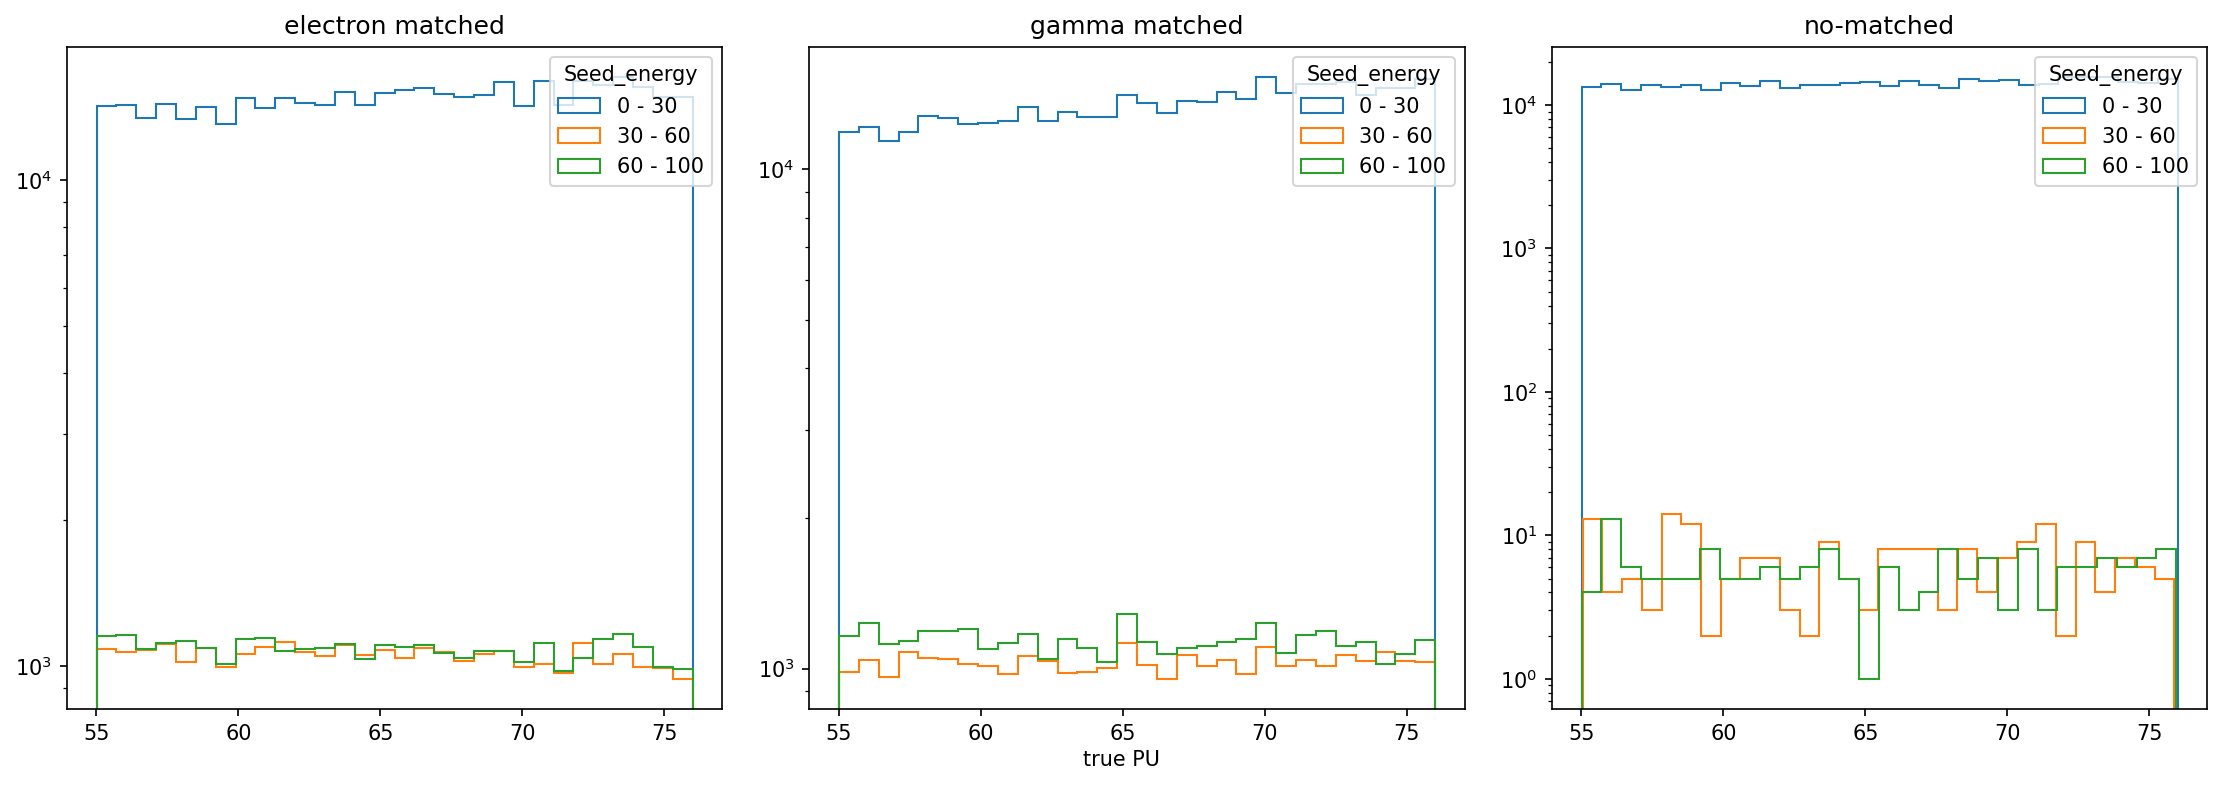

In [38]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout()

for i in range(len(df)):
    ax = axis[i]
    ax.set_title(df_title[i])
    for j, en in enumerate(energy_range):
        ax.hist(df[i]['truePU'][(df[i]['et_cluster']>=en[0])&(df[i]['et_cluster']<en[1])], label=energy_title[j], bins=30, histtype="step")
    ax.set_yscale("log")
    ax.legend(title="Seed_energy")
    
fig.text(0.5, 0., 'true PU', ha='center')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')